In [2]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [4]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

# À vous !
Ces données portent sur les résultats des élèves de deux écoles portugaises dans l'enseignement secondaire. Les attributs des données comprennent les notes des élèves, les caractéristiques démographiques, sociales et scolaires)et elles ont été recueillies à l'aide de rapports scolaires et de questionnaires. Deux ensembles de données sont fournis concernant la performance dans deux sujets distincts : Mathématiques (mat) et portugais (por). 
- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20)

In [5]:
df = pd.read_csv("students.csv", index_col=0)

In [6]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2.0,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1.0,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,other,mother,1.0,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1.0,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1.0,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,NaN,reputation,mother,1.0,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1.0,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2.0,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,NaN,M,15,U,LE3,A,3,2,NaN,other,home,mother,1.0,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1.0,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,337.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.445104,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.709700,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        391 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          343 non-null object
Fjob          345 non-null object
reason        395 non-null object
guardian      381 non-null object
traveltime    337 non-null float64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 

In [9]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 394
Data columns (total 33 columns):
school        246 non-null object
sex           246 non-null object
age           246 non-null int64
address       246 non-null object
famsize       246 non-null object
Pstatus       246 non-null object
Medu          246 non-null int64
Fedu          246 non-null int64
Mjob          246 non-null object
Fjob          246 non-null object
reason        246 non-null object
guardian      246 non-null object
traveltime    246 non-null float64
studytime     246 non-null int64
failures      246 non-null int64
schoolsup     246 non-null object
famsup        246 non-null object
paid          246 non-null object
activities    246 non-null object
nursery       246 non-null object
higher        246 non-null object
internet      246 non-null object
romantic      246 non-null object
famrel        246 non-null int64
freetime      246 non-null int64
goout         246 non-null int64
Dalc          246 

### Verify missing value according data volumns
- 14% missing value in traveltime
- 13% missing value in Mother job
- 12% missing value in Father job
- 3% missing value in guardian
- 1% missing value in
> on decide de supprimer les données manquantes

les features ont des données manquantes ['traveltime', 'Mjob', 'Fjob', 'guardian', 'school']


Text(0.5,1,'ratio of missing data')

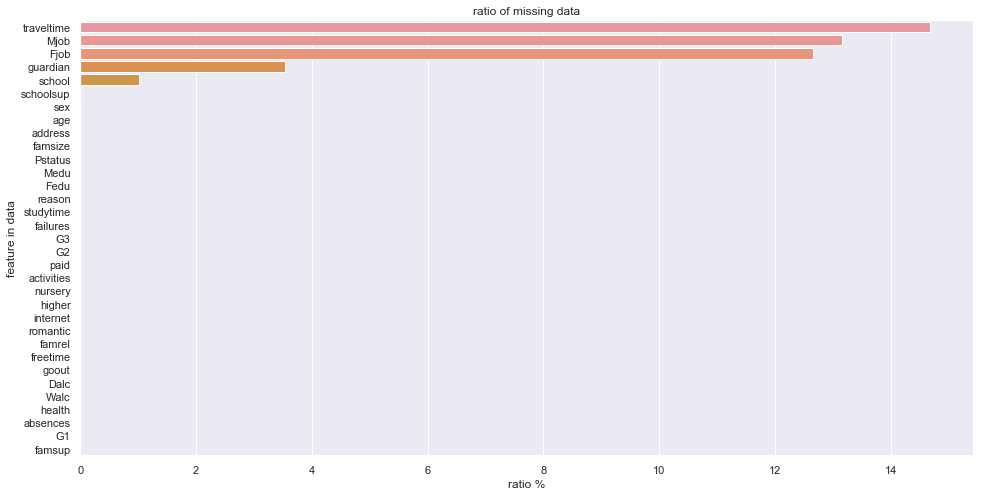

In [10]:
null_c = df.isnull().sum(axis=0).sort_values(ascending=False)*100/df.shape[0]
print("les features ont des données manquantes {}".format(list(null_c[null_c !=0].index)))
a = null_c.values
b = null_c.index
sns.barplot(x=a, y=b  )
plt.xlabel("ratio %")
plt.ylabel("feature in data")
plt.title("ratio of missing data")

- traveltime => mode
- school => mode
- guardian => other
- Mjob => add other feature => other
- Fjob => add other feature => other

In [11]:
df.loc[df['traveltime'].isnull(),'traveltime'] = df['traveltime'].mode().ravel()[0]
df.loc[df['school'].isnull(),'school'] = df['school'].mode().ravel()[0]
df.loc[df['guardian'].isnull(),'guardian'] = 'other'
df.loc[df['Mjob'].isnull(),'Mjob'] = 'other'
df.loc[df['Fjob'].isnull(),'Fjob'] = 'other'

In [12]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# single variable analyst

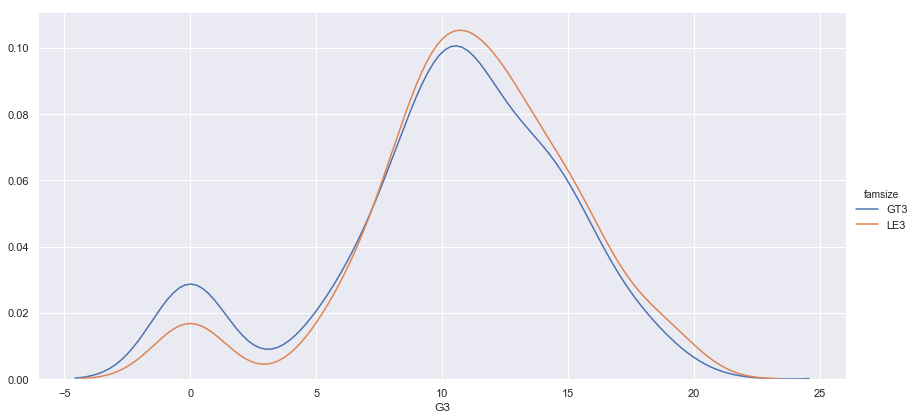

In [13]:
g = sns.FacetGrid(df, hue='famsize', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

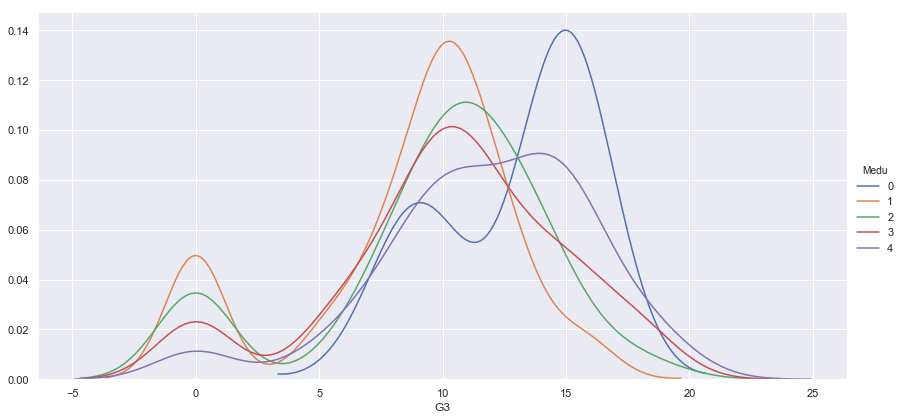

In [14]:
g = sns.FacetGrid(df, hue='Medu', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

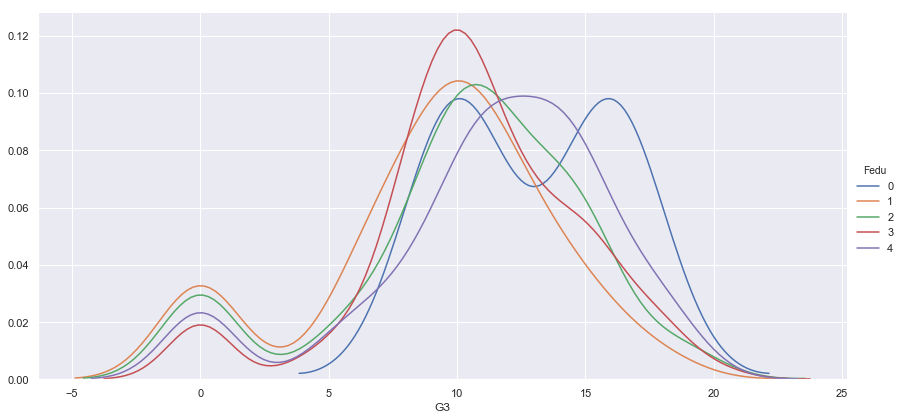

In [15]:
g = sns.FacetGrid(df, hue='Fedu', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

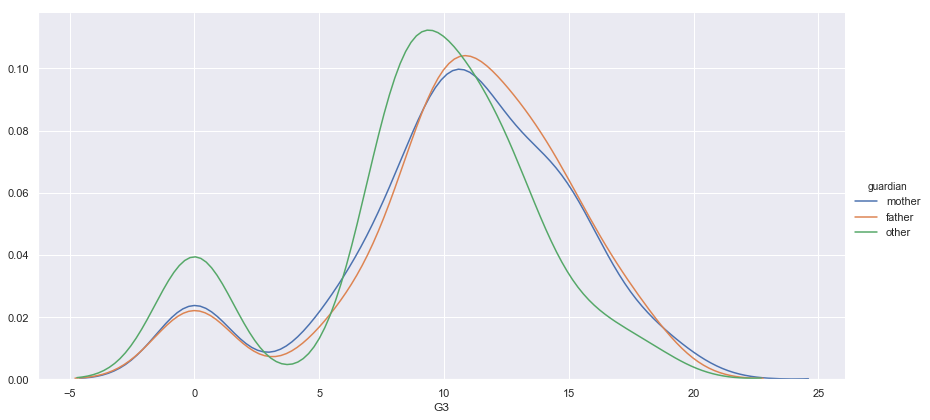

In [16]:
g = sns.FacetGrid(df, hue='guardian', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

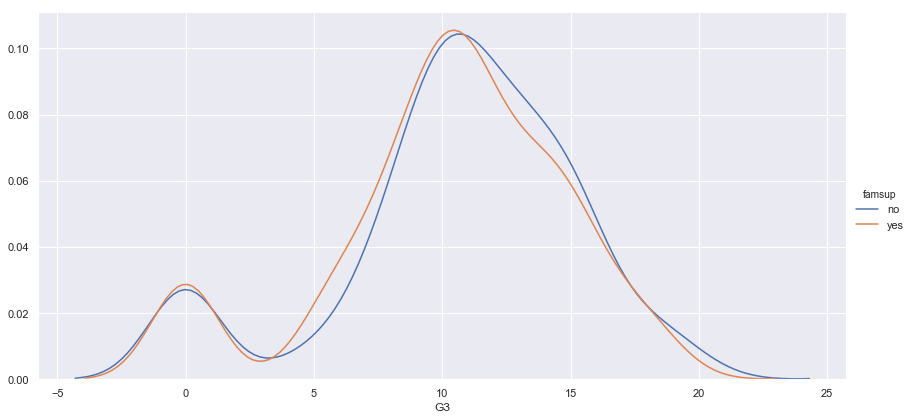

In [17]:
g = sns.FacetGrid(df, hue='famsup', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

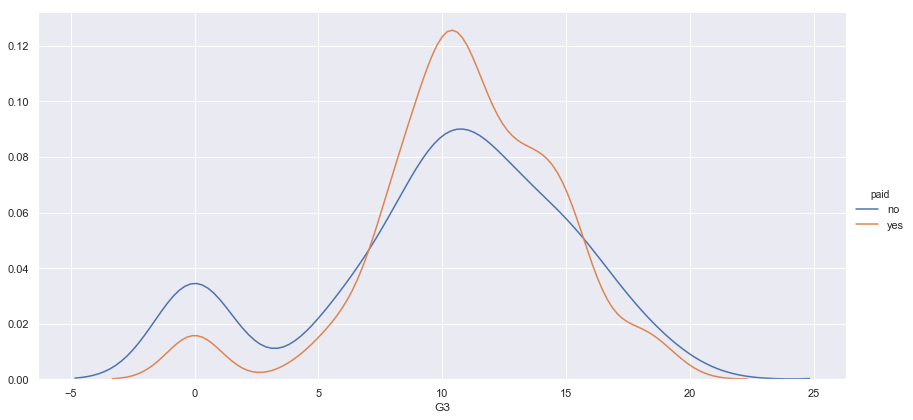

In [18]:
g = sns.FacetGrid(df, hue='paid', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

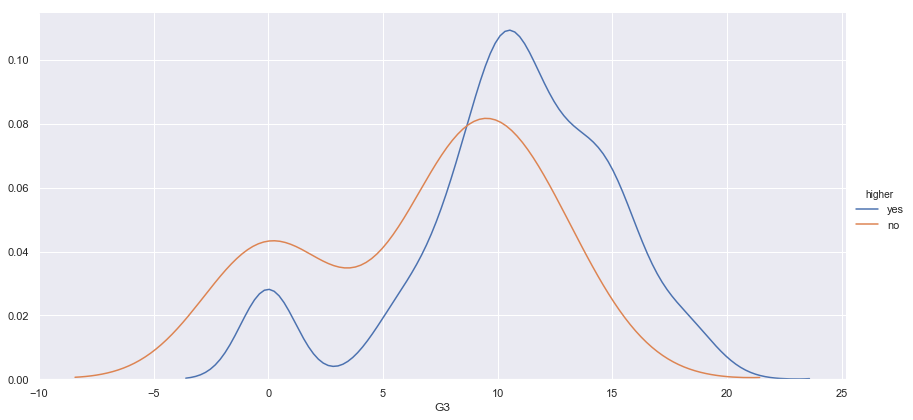

In [19]:
g = sns.FacetGrid(df, hue='higher', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

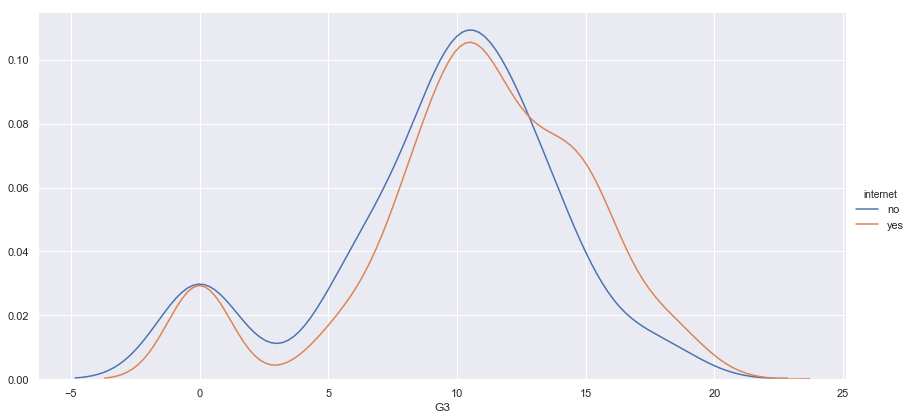

In [20]:
g = sns.FacetGrid(df, hue='internet', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

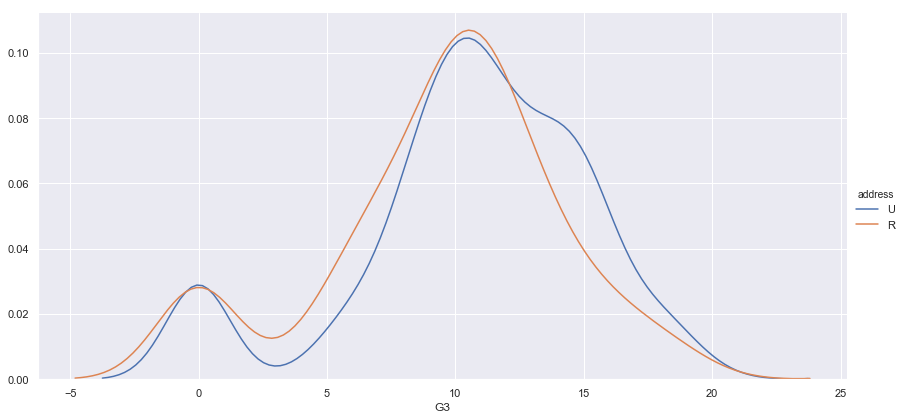

In [21]:
g = sns.FacetGrid(df, hue='address', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

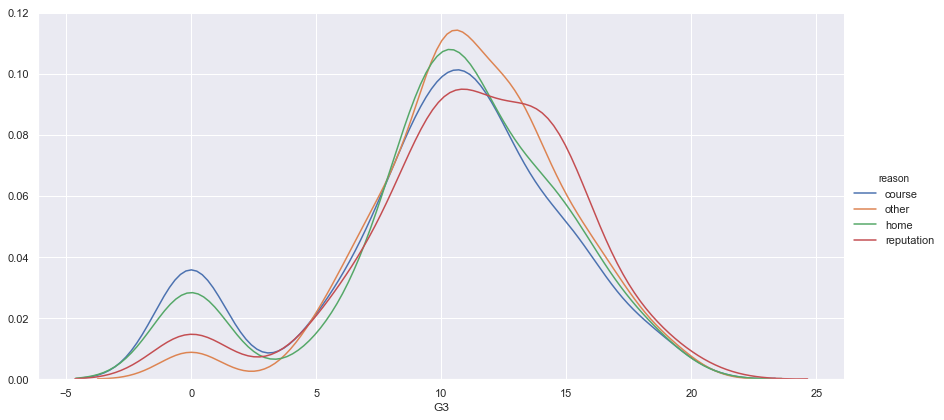

In [22]:
g = sns.FacetGrid(df, hue='reason', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

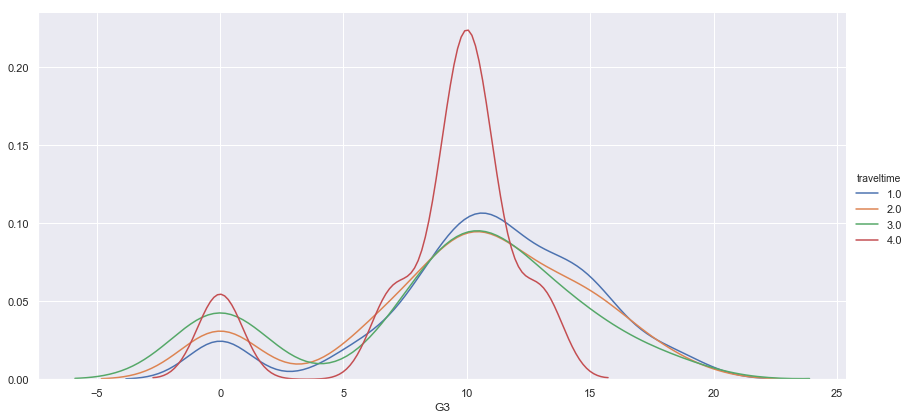

In [23]:
g = sns.FacetGrid(df, hue='traveltime', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

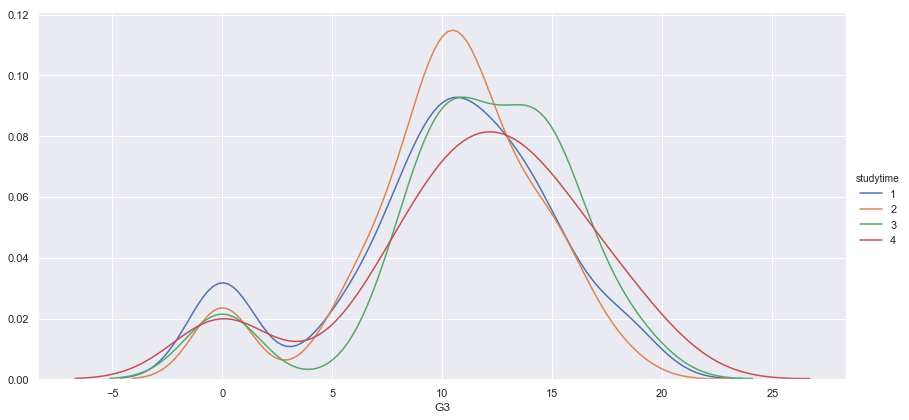

In [24]:
g = sns.FacetGrid(df, hue='studytime', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

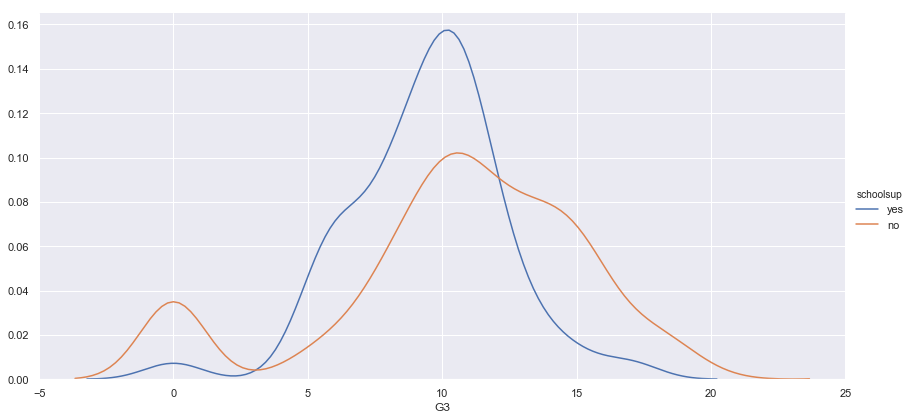

In [25]:
g = sns.FacetGrid(df, hue='schoolsup', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning:

invalid value encountered in minimum

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning:

invalid value encountered in reduce



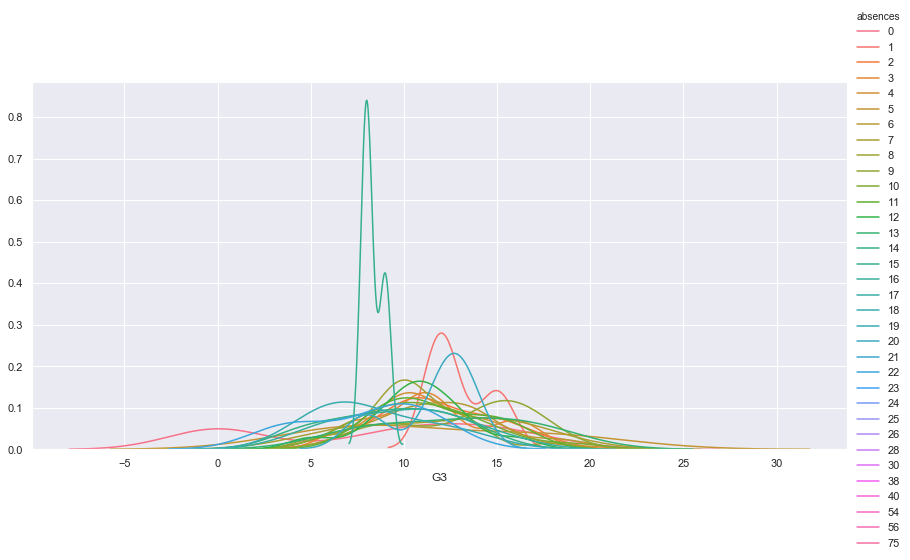

In [26]:
g = sns.FacetGrid(df, hue='absences', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

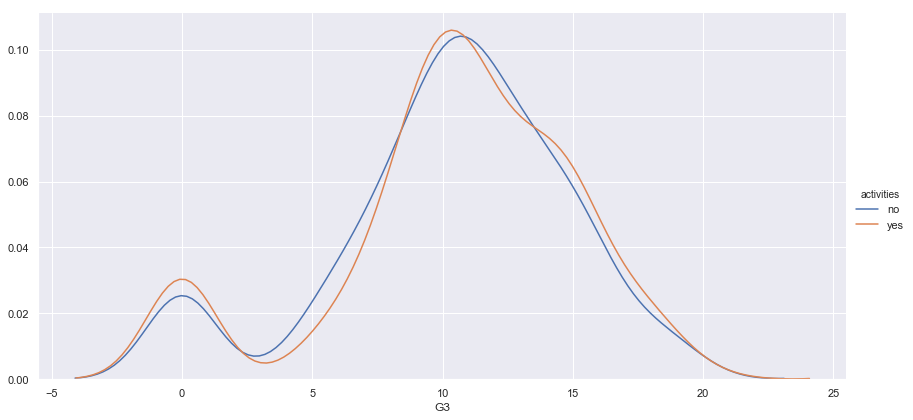

In [27]:
g = sns.FacetGrid(df, hue='activities', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

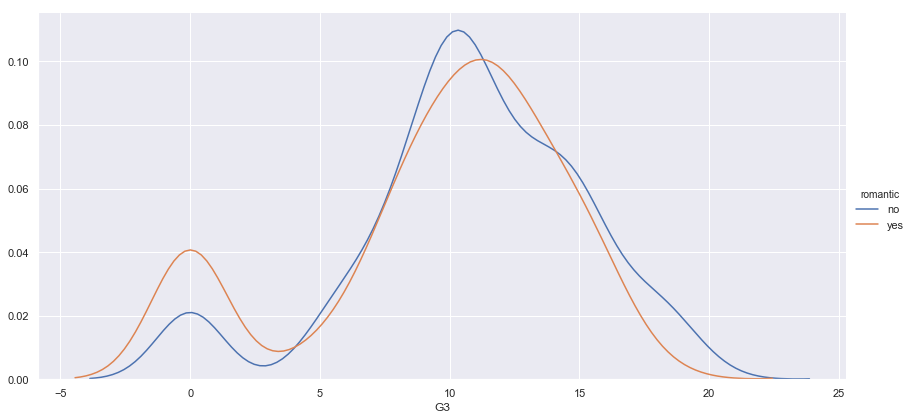

In [28]:
g = sns.FacetGrid(df, hue='romantic', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

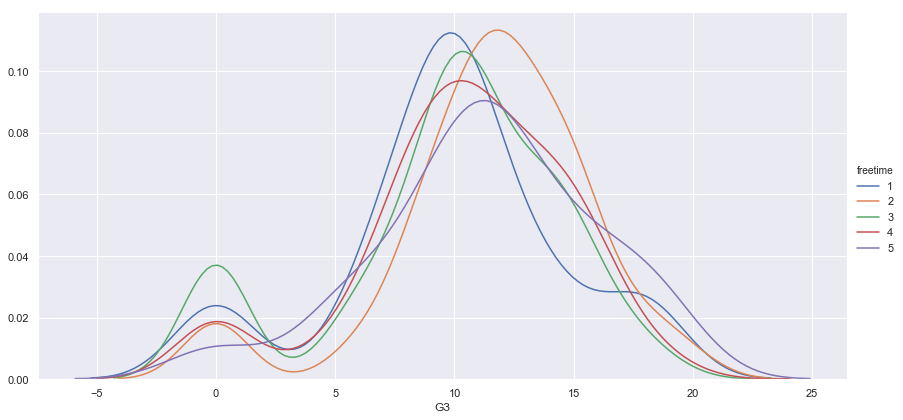

In [29]:
g = sns.FacetGrid(df, hue='freetime', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

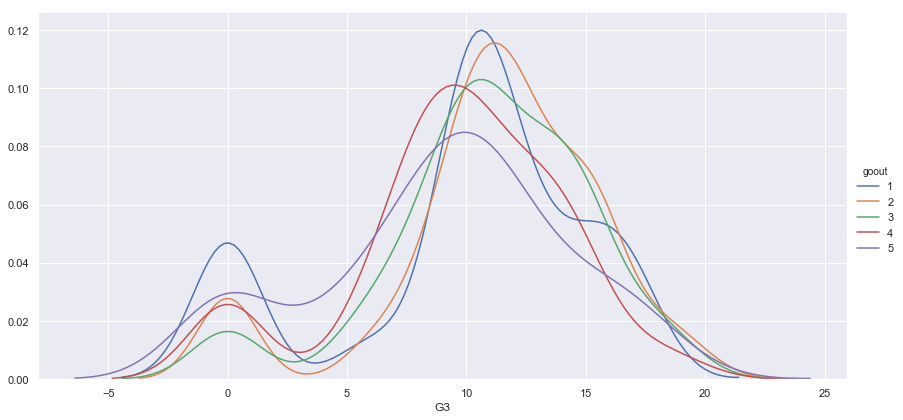

In [30]:
g = sns.FacetGrid(df, hue='goout', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

## One hot encoding:

In [31]:
col_num = ['age', 'absences', 'G1', 'G2', 'G3']
col_cat = list(set(df.columns).difference(set(col_num)))
print(col_num)
print()
print(col_cat)

['age', 'absences', 'G1', 'G2', 'G3']

['studytime', 'famsup', 'Dalc', 'activities', 'school', 'failures', 'romantic', 'Mjob', 'Pstatus', 'reason', 'health', 'schoolsup', 'famsize', 'Fedu', 'freetime', 'goout', 'nursery', 'Medu', 'higher', 'paid', 'guardian', 'sex', 'famrel', 'traveltime', 'address', 'Fjob', 'Walc', 'internet']


In [32]:
from sklearn.preprocessing  import LabelEncoder

In [33]:
for i in col_cat:
    if df[i].dtypes == 'object':
        le = LabelEncoder()
        le.fit(df[i])
        df[i] = le.transform(df[i])
df[col_cat].head()

,studytime,famsup,Dalc,activities,school,failures,romantic,Mjob,Pstatus,reason,health,schoolsup,famsize,Fedu,freetime,goout,nursery,Medu,higher,paid,guardian,sex,famrel,traveltime,address,Fjob,Walc,internet
0,2,0,1,0,0,0,0,0,0,0,3,1,0,4,3,4,1,4,1,0,1,0,4,2.0,1,4,1,0
1,2,1,1,0,0,0,0,0,1,0,3,0,0,1,3,3,0,1,1,0,0,0,5,1.0,1,2,1,1
2,2,0,2,0,0,3,0,0,1,2,3,1,1,1,3,2,1,1,1,1,1,0,4,1.0,1,2,3,1
3,3,1,1,1,0,0,1,1,1,1,5,0,0,2,2,2,1,4,1,1,1,0,3,1.0,1,3,1,1
4,2,1,1,0,0,0,0,2,1,1,5,0,0,3,3,2,1,3,1,1,0,0,4,1.0,1,2,2,0


In [34]:
def box_plot(dt, name_f):
    trace = go.Box(
        x = dt[name_f].values,
        name = name_f,
        showlegend=False,
        marker=dict(
            color='rgb(8, 81, 156)',
        ),
    )
    return trace
fig = tools.make_subplots(rows=5, cols=1, subplot_titles=col_num)
for i in range(0, len(col_num)):
    trace = box_plot(df, col_num[i])
    fig.append_trace(trace, i+1, 1)

fig['layout'].update(height=1200, width=800, paper_bgcolor='rgb(233,233,233)', title="Box plot of numerical features")
iplot(fig, filename='jupyter-styled_box')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]



## all of student who got 0 from G2, certainly got 0 for G3. This case of abandon

In [35]:
df[df.G2 == 0][['G2','G3']]

,G2,G3
130,0,0
131,0,0
134,0,0
135,0,0
136,0,0
137,0,0
144,0,0
153,0,0
162,0,0
242,0,0


In [36]:
trace = go.Heatmap(z=corr_numeric.values, x=list(corr_numeric.index), y=list(corr_numeric.index))
data=[trace]
iplot(data, filename='heatmap-corr')

NameError: name 'corr_numeric' is not defined

In [ ]:
Walc : studytime, goout, Dalc
sex

In [ ]:
corr_numeric[abs(corr_numeric['G3'])>0.2]['G3']
#corr_numeric['G3']>0.5

In [ ]:
sns.regplot('G1', 'G2', data=df)

In [ ]:
sns.regplot('G1', 'G3', data=df)

In [ ]:
sns.regplot('G2', 'G3', data=df)

In [ ]:
col_num

In [ ]:
col_cat

# Conclusion:
- G1 et G2 forte corrélé positif entre eux
- G1 et G2 corrélé avec G3
- 